This jupyter notebook will help us in creating graphs and charts for our results. It will have basic functionality to calculate speedup and efficiency

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [3]:
# loop through a list of threaded results and compare to sequential execution to find a df of threads, avg, sppedup, and efficiency
def calc_speedup(seq_list, thread_lists):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  print('Sequential Execution time average: ', seqAvg)

  num_of_threads = 0
  results = []
  result_names = ['Threads', 'STD', 'Avg', 'Speedup', 'Efficiency']

  for thread_list in thread_lists:
    # Remove max and min for current list
    thread_list.remove(max(thread_list))
    thread_list.remove(min(thread_list))

    num_of_threads += 1
    thread_avg = round(np.average(thread_list), 3)
    speedup = round(seqAvg/thread_avg, 3)
    efficiency = round(speedup/num_of_threads, 3)
    standard_dev = round(np.std(thread_list), 5)
    results.append([num_of_threads, standard_dev, thread_avg, speedup, efficiency])

  df = pandas.DataFrame(results, columns=result_names)  
  return df

In [4]:
# Will take a dataframe with Avg, Speedup, and Efficiency and plot them
def plot_speedup(df):
  ax = plt.gca() 
  df.plot(kind = 'line', x = 'Threads', y = 'Avg', color = 'green', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'orange', ax = ax)
  plt.show();

In [5]:
# Will take a list of sequential results and return the average of the list
def avg(seq_list):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  return seqAvg

In [6]:
seq_50_I = [0.002076, 0.000901, 0.001030, 0.000911, 0.000918, 0.000917, 0.000913]
seq_100_I = [0.001745, 0.002070, 0.001904, 0.001629, 0.001738, 0.001602, 0.001642]
seq_500_I = [0.007565, 0.008103, 0.009661, 0.007396, 0.006616, 0.007606, 0.007011]
seq_1000_I = [0.014518, 0.013678, 0.014778, 0.014314, 0.014415, 0.014477, 0.009118]

In [ ]:
# Execution times - simple addition of omp parrallel for
thread_1_list = []
thread_2_list = []
thread_3_list = []
thread_4_list = []
thread_5_list = []
thread_6_list = []
thread_7_list = []
thread_8_list = []
Seq_list = []

thread_lists = [thread_1_list, thread_2_list, thread_3_list, thread_4_list, thread_5_list, thread_6_list, thread_7_list, thread_8_list]

In [7]:
# print the averages of the sequential execution times
print('50 Iterations:', avg(seq_50_I))
print('100 Iterations:', avg(seq_100_I))
print('500 Iterations:', avg(seq_500_I))
print('1000 Iterations:', avg(seq_1000_I))

50 Iterations: 0.0009377999999999999
100 Iterations: 0.0017316000000000002
500 Iterations: 0.007536200000000002
1000 Iterations: 0.014280400000000002


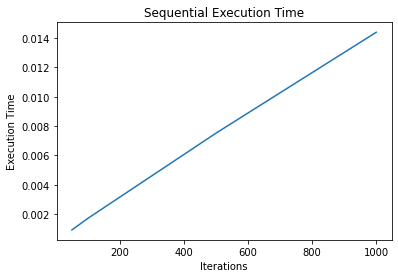

In [8]:
# plot the averages of the sequential execution times
seq_50_I_avg = avg(seq_50_I)
seq_100_I_avg = avg(seq_100_I)
seq_500_I_avg = avg(seq_500_I)
seq_1000_I_avg = avg(seq_1000_I)

seq_avg = [seq_50_I_avg, seq_100_I_avg, seq_500_I_avg, seq_1000_I_avg]
seq_iterations = [50, 100, 500, 1000]

plt.plot(seq_iterations, seq_avg)
plt.xlabel('Iterations')
plt.ylabel('Execution Time')
plt.title('Sequential Execution Time')
plt.show()


In [ ]:
df = calc_speedup(Seq_list, thread_lists)
df